# Linear Regression

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Load testing data

In [4]:
df_1d = pd.read_csv('../machine_learning_examples/linear_regression_class/data_1d.csv', header=None)
df_1d.columns = ["X", "y"]

# 1-D linear regression
### Theory behind

Machine learning algorithms are essentially optimisation problems. They usually minmises a cost function through an iterative process such as gradient descent. Linear regression is no exception and the most common cost function used is the squared error represented by the following equation.
$$ E = \sum_{i=1}^N (y_i - \hat y_i)^2 $$
The true value of a given data point is denoted by $y_i$ and the estimated data point $\hat y_i$. Their difference is the error. To calculate the cost of the model all erros are squared and then summed. In the case of a 1-D linear regression, the analytical solution is simple enough that the use of an optimisation algorithm would not be necessary. All we have to do is take the derivative of the cost function and set it to 0 to locate the turning point. We know this works because the cost function is a parabola and has 1 global minimum. We know that a 1-D linear regression model can be represented by the simple equation of $y = mx + c$. Therefore we can substitute $\hat y_i$ with this equation and express the cost $E$ as a function of $m$ and $c$. To find the combination of $m$ and $c$ that would produce the lowest cost, we need to take the partial derivative of both parameters respectively. We would then end up with the following equations:

\begin{align}
\frac{\partial E}{\partial m} & = \sum_{i=1}^N 2[y_i-(mx_i+c)](-x_i) \\
\frac{\partial E}{\partial c} & = \sum_{i=1}^N 2[y_i-(mx_i+c)](-1)
\end{align}

By applying the summation to each term and setting the derivatives to 0. The equations then becomes 

\begin{align}
0 & = \sum_{i=1}^N -x_iy_i + \sum_{i=1}^N mx_i^2 + \sum_{i=1}^N cx_i \\
0 & = \sum_{i=1}^N -y_i + \sum_{i=1}^N mx_i + \sum_{i=1}^N c
\end{align}

Since c is a constant term $ \sum_{i=1}^N c $ becomes $cN$. Here we have 2 equations with 2 unknows. By using substitution we can find the solutions for m and c respectively.

\begin{align}
m & = \frac{N\sum_{i=1}^N x_iy_i - \sum_{i=1}^N x_i \sum_{i=1}^N y_i}{N\sum_{i=1}^N x_i^2 - (\sum_{i=1}^N x_i)^2} \\
c & = \frac{N\sum_{i=1}^N x_i \sum_{i=1}^N x_iy_i - \sum_{i=1}^N y_i \sum_{i=1}^N x_i^2}{N\sum_{i=1}^N x_i^2 - (\sum_{i=1}^N x_i)^2}
\end{align}

To get rid of the confusing summation sign we can multiply $\frac{1}{N^2}$ to both the top and bottom of the equations. This is esentially representing each terms as means instead of sums. This is also the final solution that is implemented into the fitting function in the class LinearRegression_1D.

\begin{align}
m & = \frac{\overline{xy} - \bar x \bar y}{\overline{x^2} - \bar x ^2} \\
c & = \frac{\bar y \overline{x^2} - \bar x \overline{xy}}{\overline{x^2} - \bar x^2}
\end{align}

### $R^2$ metric

To measure how good a regression is, $R^2$ is normally used. The definition of $R^2$ is as follows:

$$R^2 = 1 - \frac{\sum_i^N (y_i - \hat y_i))^2}{\sum_i^N (y_i - \bar y))^2}$$

The top of the term on the R.H.S is called sum of squared residual ($SS_{res}$) which is the same as the cost function we used in optimisation. The bottom term is called the sum of squared error total ($SS_{tot}$)which is the sum of squared error that we would get if we just assign the mean of array $y$ to every prediction. The intuition is as follows; if we had a very good prediction, $SS_{res}$ would be small hence the the term on the R.H.S tends to 0. 1 - 0 is 1 so the $R^2$ would be very close to 1. On the other hand if our prediction is no different to blindly assigning average values, the term on the R.H.S would tend to 1 and hence $R^2$ would approach 0.

In [41]:
################################################################################
"""
Implementation of a 1-D linear regression.
"""
class LinearRegression_1D():

    def __init__(self):
        self.coef = None
        self.intp = None
        
    def fit(self, x, y):
        """Fit 1D linear regression using analytical solution,
        
        We assume a squared error cost function. In order to minmise the cost 
        function we take the derivative and find the turning point. Since it is
        a 1D linear regression we assume that there is only 1 global minimum.
        """
        a = (np.mean(x*y) - np.mean(x) * np.mean(y))/ \
            ((np.mean(x**2) - (np.mean(x))**2))
        b = (np.mean(y) * np.mean(x**2) - np.mean(x) * np.mean(x*y))/ \
            ((np.mean(x**2) - (np.mean(x))**2))
        # print("Model fitted")
        # print(f"Slope is {a}")
        # print(f"Intercept is {b}")
        self.coef = a
        self.intp = b
        return self

    def predict(self, x):
        """Using the fitted model to predict new data."""
        result = self.coef * x + self.intp 
        return result
    
    def __repr__(self):
        """Nice print out of class"""
        return (f"LinearRegression_1D()\nCoefficient is {self.coef}"
            f"\nIntercept is {self.intp}")
    
    def r_squared(self, X, y):
        """Calualte R^2 for the regression."""
        y_hat = self.predict(X)
        return 1 - np.sum(((y - y_hat)**2) / np.sum((y - np.mean(y))**2))
        

################################################################################

### Test function

In [43]:
# Define features X and labels y
X = df_1d["X"].values.reshape(-1, 1)
y = df_1d["y"].values.reshape(-1, 1)

# Create and fit model
reg = LinearRegression_1D()
model = reg.fit(X, y)

# Perform prediction
print(model.predict(5))
print(model.r_squared(X, y))

12.727484913083217
0.9911838202977805


### Plot data and prediction

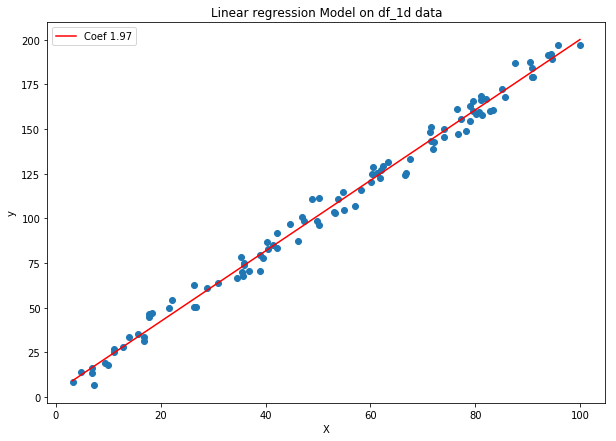

In [26]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(X, y)
prediction_X = [X.min(), X.max()]
prediction_y = [model.predict(data) for data in prediction_X]
plt.plot(prediction_X, prediction_y, label=f"Coef {round(model.coef, 2)}", color='r')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear regression Model on df_1d data")
plt.legend()
plt.show()

# Multiple Linear Regression

The difference between a 1-D linear regression and multiple linear regression is that now we have more than 1 features in the predictors. This means $x$ has become a matrix rather than a vector. The representing linear equation now becomes
$$ y = w^TX + c$$
We can also include the intercept term into the feature x by adding a column of 1s. Therefore the equation futher simplifies to
$$ y = w^TX$$

In [ ]:
class LinearRegression():
    
    def fit(self, X, y, eta, max_iter):
        w = self._initialise_weight(X)
        for i in range(max_iter):
            pred = predict()
            cost = self._calculate_cost()
        pass
    
    def predict(self, X):
        pass
    
    def _calculate_cost(self, y_true, y_pred, cost_function="mse"):
        """Calculate the cost for this iteration."""
        if cost_function == "mse":
            pass
        elif cost_function == "mae":
            pass
        else:
            raise Exception("Only mae or mse are allowed as cost functions")
            
    def _initialise_weight(self, X):
        """Initialise the weight for linear regression."""
        return np.ones(X.shape)
    
    def _update_weight(self, w, eta):
        """This function uses gradient descent to update current weight."""
        pass
    
